In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#### Loading our data

In [2]:
data_ = pd.read_excel('Files/Rice_Osmancik_Cammeo_Dataset.xlsx')

In [3]:
y = np.array(data_.iloc[:,-1])


In [4]:
data_.iloc[:,0:7]

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


#### Standardize the data

In [5]:
data = data_.iloc[:,0:7]
st_data = (data - data.mean())/data.std()
## Could have simply used StandardScaler()
st_data.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03
mean,-2.124285e-16,-5.739940e-16,-1.181324e-16,-2.456478e-16,9.097418e-16,2.152259e-16,-4.754435e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.953604e+00,-2.672668e+00,-2.493699e+00,-4.674031e+00,-5.266589e+00,-2.942926e+00,-2.130034e+00
25%,-7.488177e-01,-7.892340e-01,-8.265593e-01,-6.251605e-01,-6.950351e-01,-7.463521e-01,-8.165818e-01
50%,-1.421335e-01,-1.513238e-01,-1.699936e-01,2.109949e-02,1.046992e-01,-1.384360e-01,-2.145634e-01
75%,7.401849e-01,8.271624e-01,8.467241e-01,6.684203e-01,7.550077e-01,7.493101e-01,8.367238e-01
max,3.605050e+00,2.646475e+00,2.878973e+00,3.704952e+00,2.936761e+00,3.458976e+00,2.577922e+00


In [6]:
st_data

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
0,1.479635,2.004091,2.348238,-0.212915,2.018073,1.499463,-1.152770
1,1.147720,1.125705,0.988261,0.945444,0.409964,1.192761,-0.602000
2,1.135020,1.317041,1.451718,0.253854,1.212797,1.126356,0.405558
3,0.293398,0.115285,0.261405,0.198025,0.239720,0.233826,-0.275315
4,1.166191,1.486858,1.316269,0.523351,0.952096,1.299685,-0.205986
...,...,...,...,...,...,...,...
3805,-0.708122,-1.078211,-1.048185,-0.097238,-1.085140,-0.745367,0.246999
3806,-0.601909,-0.922805,-1.207050,0.549550,-1.970472,-0.590047,0.418760
3807,-0.133186,-0.329808,-0.298206,0.085208,-0.275063,-0.173045,-0.455671
3808,-1.608046,-1.740092,-1.580764,-1.414228,-0.598743,-1.606945,-0.037163


#### Apply pca

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
data_reduced = pca.fit_transform(st_data)
pc0 = data_reduced[:, 0]
pc1 = data_reduced[:, 1]

In [8]:
data_reduced

array([[ 3.81212784, -2.16504685],
       [ 2.47683257,  0.04529019],
       [ 2.63820924, -0.62153372],
       ...,
       [-0.43662669,  0.10358082],
       [-3.58746234, -0.37565233],
       [-2.55575212,  3.36079599]])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

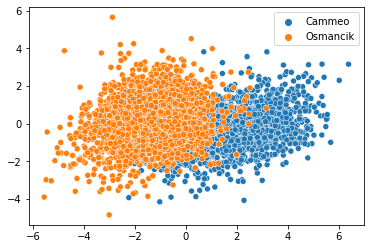

In [9]:
sns.scatterplot(pc0,pc1,hue = y)

We can see two clear clusters here so knn would work quite well in those regions. However the boundary of the 2 clusters with pc0 in the neigbourhood of 0 and pc1 between -3 and 2 is where the predictions may be inaccurate.

#### Original method for k nearest types, new methods below

In [10]:
def find_k_nearest_types(test_pt, known_pts, types, k):
    test_pt = np.array(test_pt)
    distances = [np.linalg.norm(test_pt - pt) for pt in known_pts]
    k_smallest_indices = np.argpartition(distances, k)[:k]
    return [types[i] for i in k_smallest_indices]

#### Add indices to the data1 array, these are also in float but can be cast to int when we need to refer to points in the main data

In [11]:
idxs = [i for i in range(len(pc0))]
data1 = np.array([pc0,pc1,idxs])
#data1 = list(zip(pc0.ravel(),pc1.ravel()))

In [12]:
data1

array([[ 3.81212784e+00,  2.47683257e+00,  2.63820924e+00, ...,
        -4.36626685e-01, -3.58746234e+00, -2.55575212e+00],
       [-2.16504685e+00,  4.52901938e-02, -6.21533719e-01, ...,
         1.03580824e-01, -3.75652326e-01,  3.36079599e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         3.80700000e+03,  3.80800000e+03,  3.80900000e+03]])

#### Quad tree class

In [13]:

class quadTree:

    def __init__(self,rect_coordinates,data_,depth_ = 0,leaf = 5):
        #do stuff
    
        self.x_min = min(rect_coordinates[0][0],rect_coordinates[1][0],rect_coordinates[2][0],rect_coordinates[3][0])
        self.x_max = max(rect_coordinates[0][0],rect_coordinates[1][0],rect_coordinates[2][0],rect_coordinates[3][0])
        self.y_min = min(rect_coordinates[0][1],rect_coordinates[1][1],rect_coordinates[2][1],rect_coordinates[3][1])
        self.y_max = max(rect_coordinates[0][1],rect_coordinates[1][1],rect_coordinates[2][1],rect_coordinates[3][1])
        self.leafNode = False
        self.depth = depth_
        self.points = []
        self.add(data_)
        
        self.numPoints = len(self.points[0])
        
        if(self.numPoints<=leaf):
            self.leafNode = True
            return
        

        self.x_median = np.median(self.points[0])
        self.y_median = np.median(self.points[1])

        # lets set the order as ul,ll,ur,lr
        rect_coordinates_ul = [rect_coordinates[0],(self.x_min,self.y_median),(self.x_median,self.y_max),(self.x_median,self.y_median)]
        rect_coordinates_ll = [(self.x_min,self.y_median),rect_coordinates[1],(self.x_median,self.y_median),(self.x_median,self.y_min)]
        rect_coordinates_ur = [(self.x_median,self.y_max),(self.x_median,self.y_median),rect_coordinates[2],(self.x_max,self.y_median)]
        rect_coordinates_lr = [(self.x_median,self.y_median),(self.x_median,self.y_min),(self.x_max,self.y_median),rect_coordinates[3]]

        self.ULChild = quadTree(rect_coordinates_ul,self.points,depth_ = self.depth + 1,leaf = leaf)
        self.LLChild = quadTree(rect_coordinates_ll,self.points,depth_ = self.depth + 1,leaf = leaf)
        self.URChild = quadTree(rect_coordinates_ur,self.points,depth_ = self.depth + 1,leaf = leaf)
        self.LRChild = quadTree(rect_coordinates_lr,self.points,depth_ = self.depth + 1,leaf = leaf)

        self.children = [self.ULChild,self.LLChild,self.URChild,self.LRChild]

        if(self.leafNode == False):
            del self.points

    def contains(self,x,y):    
        if((self.x_min <= x) and (x < self.x_max) and (self.y_min <= y) and (y < self.y_max)):
            return True
        return False

    def add(self,data_):
        points_x = []
        points_y = []
        points_idxs = []
        for i in range(0,len(data_[0])):
            
            if(self.contains(data_[0][i],data_[1][i])):
                points_x.append(data_[0][i])
                points_y.append(data_[1][i])
                points_idxs.append(data_[2][i])
        
        self.points = np.array([points_x,points_y,points_idxs],dtype = float)
    
    def getPoints(self):
        if(self.leafNode):
            return self.points
        
        return np.concatenate((self.ULChild.getPoints(),self.LLChild.getPoints(),self.URChild.getPoints(),self.LRChild.getPoints()),axis = 1)
    
    def getDepth(self):
        if(self.leafNode):
            return self.depth
        return max(self.ULChild.getDepth(),self.LLChild.getDepth(),self.URChild.getDepth(),self.LRChild.getDepth())
        

    def getDistance(self,x,y,xp,yp):
        return np.linalg.norm((x-xp,y-yp))
        
    def checkBox(self,d,x,y):
        if(self.contains(x,y)):
            return True
        if(x<=self.x_min):
            #set of conditions
            if(y<=self.y_min):
                d_prime = self.getDistance(x,y,self.x_min,self.y_min)
                if(d_prime<=d):
                    return True
            elif(y>=self.y_max):
                d_prime = self.getDistance(x,y,self.x_min,self.y_max)
                if(d_prime<=d):
                    return True
            else:
                d_prime = self.getDistance(x,y,self.x_min,y)
                if(d_prime<=d):
                    return True

        elif(x>self.x_max):
            #set of conditions
            if(y<=self.y_min):
                d_prime = self.getDistance(x,y,self.x_max,self.y_min)
                if(d_prime<=d):
                    return True
            elif(y>=self.y_max):
                d_prime = self.getDistance(x,y,self.x_max,self.y_max)
                if(d_prime<=d):
                    return True
            else:
                d_prime = self.getDistance(x,y,self.x_max,y)
                if(d_prime<=d):
                    return True

        else:
            if(y<=self.y_min):
                d_prime = self.getDistance(x,y,x,self.y_min)
                if(d_prime<=d):
                    return True
            elif(y>=self.y_min):
                d_prime = self.getDistance(x,y,x,self.y_max)
                if(d_prime<=d):
                    return True

        return False
    

    def leaves_within_distance(self,d,x,y):
        if(self.leafNode):
            if(self.checkBox(d,x,y)):
                return self.points
            else:
                return np.array([[],[],[]])
        return np.concatenate((self.ULChild.leaves_within_distance(d,x,y),self.LLChild.leaves_within_distance(d,x,y),self.URChild.leaves_within_distance(d,x,y),self.LRChild.leaves_within_distance(d,x,y)),axis = 1)
    
    def getFirstBox(self,k,x,y):
        if(self.leafNode):
            return self
        # if((self.contains(x,y)) and (self.numPoints >= k) and ((self.leafNode) or (min(self.children[0].numPoints,self.children[1].numPoints,self.children[2].numPoints,self.children[3].numPoints)<k))):
        #     return self
        
        for child in self.children:
            
            if(child.contains(x,y)):
                
                if(child.numPoints>=k):
                    return child.getFirstBox(k,x,y)
                else:
                    return self
            

       



In [14]:
def getQuadTree(data1,leaf = 5):
    xmin = min(data1[0]) - 2
    xmax = max(data1[0]) + 2
    ymin = min(data1[1]) - 2
    ymax = max(data1[1]) + 2
    rect_coordinates = [(xmin,ymax),(xmin,ymin),(xmax,ymax),(xmax,ymin)]
    q1 = quadTree(rect_coordinates,data1,depth_ = 0,leaf=leaf)
    return q1

In [15]:
def k_nearest_neighbours_quad(k,x,y,quad_tree):
   BoundingBox = quad_tree.getFirstBox(k,x,y)
   points_ =  BoundingBox.getPoints()
   distances = []
   #print(len(points_[0]))
   for i in range(len(points_[0])):
      dist = BoundingBox.getDistance(x,y,points_[0][i],points_[1][i])
      distances.append(dist)
   k_smallest_indices = np.argpartition(distances, k-1)[:k]
   
   #print(k_smallest_indices,distances,distances[k_smallest_indices[-1]])
   kth_dist = distances[k_smallest_indices[-1]]

   points2 = quad_tree.leaves_within_distance(kth_dist,x,y)
   #print(len(points2[0]))
   distances2 = []
   for j in range(len(points2[0])):
      dist = BoundingBox.getDistance(x,y,points2[0][j],points2[1][j])
      distances2.append(dist)
   k_smallest_indices_2 = np.argpartition(distances2, k-1)[:k]

   #print(k_smallest_indices_2,distances2,distances2[k_smallest_indices_2[-1]])

   vals = [points2[:,i] for i in k_smallest_indices_2]

   return vals
      
    
       
      
    

In [16]:
def get_Indices(arr_points):
    idx_arr = []
    for i in range(len(arr_points)):
        idx_arr.append(int(arr_points[i][2]))
    return np.array(idx_arr,dtype = int)

In [17]:

def find_k_nearest_points(k,known_pts,x,y):
    test_pt = np.array([[x,y]])
    distances = []
    #print(len(known_pts[0]))
    for i in range(len(known_pts[0])):
        pt = known_pts[:,i]
        #print(pt)
        distances.append(np.linalg.norm(test_pt - pt))
    
    
    k_smallest_indices = np.argpartition(distances, k)[:k]
    return k_smallest_indices,distances


In [18]:
def get_majority_vote(y):
    values,counts = np.unique(y,return_counts=True)
    #print(values)
    #print(counts)
    idx = np.argmax(counts)
    return values[idx]

#### Create a dummy dataset and see how k nearest types versus k nearest types quad perform

In [19]:
data_lst = []
data_lst.append(data1)
for i in range(2,100):
    data_lst.append(data1**i)
data_smpl = np.concatenate(data_lst,axis = 1)
idxs_smpl = [i for i in range(len(data_smpl[0]))]
data_smpl[2] = idxs_smpl
len(data_smpl[0])
q1 = getQuadTree(data_smpl,10)

<ipython-input-19-5cc0d2be1f96>:4: RuntimeWarning: overflow encountered in power
  data_lst.append(data1**i)


In [20]:
vals_knn = k_nearest_neighbours_quad(10,1,1,q1)


In [21]:
k_smallest_indexes_quad = get_Indices(vals_knn)

In [22]:
k_smallest_indexes,distances = find_k_nearest_points(10,data_smpl[0:2,:],1,1)

In [23]:
data_pts = []
for i in k_smallest_indexes:
    data_pts.append(np.array(data_smpl[:,i]))
    print(distances[i])

0.050137238088751056
0.08264583002760541
0.056338711330301314
0.07833990940038524
0.07445246695304221
0.09079220333312102
0.09188489225099136
0.09231077236449849
0.09776978387222908
0.10222962609541762


#### Data points from the k nearest points method

In [24]:
data_pts

[array([9.97511089e-01, 9.49924577e-01, 3.41700000e+03]),
 array([  1.07661938,   1.03098071, 146.        ]),
 array([9.9300295e-01, 9.4409748e-01, 6.1670000e+03]),
 array([  0.92376849,   0.98194734, 188.        ]),
 array([9.79872344e-01, 9.28319826e-01, 6.69000000e+03]),
 array([1.05736489e+00, 1.07037395e+00, 3.04000000e+03]),
 array([9.19232347e-01, 9.56188819e-01, 7.52100000e+03]),
 array([9.47483067e-01, 9.24083925e-01, 2.64200000e+03]),
 array([9.95028372e-01, 9.02356702e-01, 7.22700000e+03]),
 array([9.17814338e-01, 1.06079814e+00, 7.35000000e+03])]

#### Data points from the k nearest neigbours quad method

In [25]:
vals_knn

[array([  0.92376849,   0.98194734, 188.        ]),
 array([9.79872344e-01, 9.28319826e-01, 6.69000000e+03]),
 array([  1.07661938,   1.03098071, 146.        ]),
 array([9.9300295e-01, 9.4409748e-01, 6.1670000e+03]),
 array([9.97511089e-01, 9.49924577e-01, 3.41700000e+03]),
 array([1.05736489e+00, 1.07037395e+00, 3.04000000e+03]),
 array([9.19232347e-01, 9.56188819e-01, 7.52100000e+03]),
 array([9.47483067e-01, 9.24083925e-01, 2.64200000e+03]),
 array([9.95028372e-01, 9.02356702e-01, 7.22700000e+03]),
 array([9.17814338e-01, 1.06079814e+00, 7.35000000e+03])]

In [26]:
k_smallest_indexes

array([3417,  146, 6167,  188, 6690, 3040, 7521, 2642, 7227, 7350])

In [27]:
k_smallest_indexes_quad

array([ 188, 6690,  146, 6167, 3417, 3040, 7521, 2642, 7227, 7350])

#### Check if both are equal

In [28]:
np.array_equal(np.sort(k_smallest_indexes_quad),np.sort(k_smallest_indexes))

True

#### Lets work with our own actual data

In [29]:
q2 = getQuadTree(data1)

In [30]:
from sklearn.model_selection import KFold

In [31]:
kfold = KFold(5,shuffle = True,random_state = 1)

#### k = 5 and k = 1

In [32]:
cat_pred_vals_5 = []
cat_true_vals_5 = []
counter = 0
vals_g_5 = []

cat_pred_vals_1 = []
cat_true_vals_1 = []
vals_g_1 = []

pca = decomposition.PCA(n_components=2)


for train,test in tqdm(kfold.split(data1[2])):
    train_data_raw = data_.iloc[train,0:7]
    test_data_raw = data_.iloc[test,0:7]
    st_train_data = (train_data_raw - train_data_raw.mean())/train_data_raw.std()
    st_test_data = (test_data_raw - train_data_raw.mean())/train_data_raw.std()
    ## Could have simply used StandardScaler()
    
    train_data_reduced = pca.fit_transform(st_train_data)
    test_data_reduced = pca.transform(st_test_data)
    train_data = np.array([train_data_reduced[:,0],train_data_reduced[:,1],train])
    test_data = np.array([test_data_reduced[:,0],test_data_reduced[:,1],test])
    
    q_train = getQuadTree(train_data)
    
    for i in tqdm(test):
        
        vals_5 = k_nearest_neighbours_quad(5,test_data[0,test_data[2] == i],test_data[1,test_data[2] == i],q_train)
        vals_1 = k_nearest_neighbours_quad(1,test_data[0,test_data[2] == i],test_data[1,test_data[2] == i],q_train)
        # except:
        #     print(vals)
        #     break
        vals_g_5.append(vals_5)
        k_smallest_indices_5 = get_Indices(vals_5)

        vals_g_1.append(vals_1)
        k_smallest_indices_1 = get_Indices(vals_1)
        #print(k_smallest_indices)

        y_smpl_5 = y[k_smallest_indices_5]
        cat_pred_5 = get_majority_vote(y_smpl_5)
        cat_true_5 = y[i]
        cat_pred_vals_5.append(cat_pred_5)
        cat_true_vals_5.append(cat_true_5)

        y_smpl_1 = y[k_smallest_indices_1]
        cat_pred_1 = get_majority_vote(y_smpl_1)
        cat_true_1 = y[i]
        cat_pred_vals_1.append(cat_pred_1)
        cat_true_vals_1.append(cat_true_1)
        
    
    
    counter+=1

    
        
        
   

0it [00:00, ?it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

In [34]:
from sklearn.metrics import confusion_matrix
confusionMatrix_5 = confusion_matrix(cat_true_vals_5,cat_pred_vals_5)
confusionMatrix_1 = confusion_matrix(cat_true_vals_1,cat_pred_vals_1)

In [40]:
confusionMatrix_5

array([[1464,  166],
       [ 163, 2017]])

The confusion matrix gives us true positives , false positives, true negatives and false negatives. We can use these to calculate precision and recall. 
The recall tells us of all positive values how many was the model able to "recall" correctly, its formula is given by recall = tp/tp+fn.
The precision tells us how many of the values classified by the classifier are actually positive, its formula is tp/tp+fp.

In [38]:
def calculateMetrics(confusionMatrix):
    recall = confusionMatrix[0][0]/(confusionMatrix[0][0] + confusionMatrix[1][0])
    precision = confusionMatrix[0][0]/(confusionMatrix[0][0] + confusionMatrix[0][1])

    return precision,recall


In [39]:
calculateMetrics(confusionMatrix_5)

(0.898159509202454, 0.8998156115550092)

In [41]:
calculateMetrics(confusionMatrix_1)

(0.8656441717791411, 0.8699136868064118)

Precision and Recall values are 3% better for k = 5, k = 1